In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
df.columns=['Month','Sales']

In [6]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [8]:
df.drop(105,axis=0,inplace=True)

In [9]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [10]:
df['Month'] = pd.to_datetime(df['Month'])

In [11]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [12]:
df.set_index('Month',inplace=True)

In [17]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


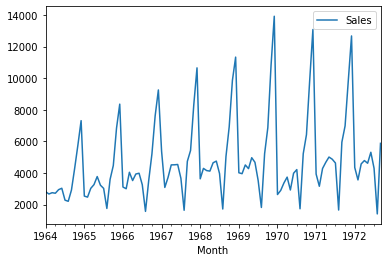

In [18]:
df.plot()

In [20]:
from statsmodels.graphics.tsaplots import plot_acf

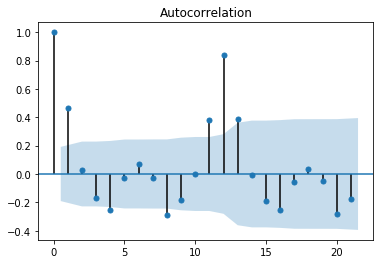

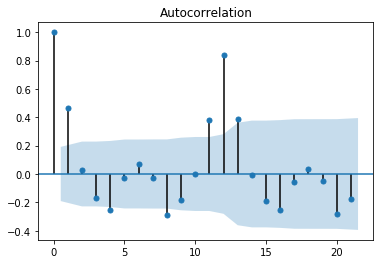

In [21]:
plot_acf(df)

In [23]:
sales_diff = df.diff(periods=1)

In [25]:
sales_diff.head()

,Sales
Month,
1964-01-01,NaN
1964-02-01,-143.0
1964-03-01,83.0
1964-04-01,-34.0
1964-05-01,225.0


In [26]:
sales_diff = sales_diff[1:]

In [30]:
sales_diff.head()

,Sales
Month,
1964-02-01,-143.0
1964-03-01,83.0
1964-04-01,-34.0
1964-05-01,225.0
1964-06-01,90.0


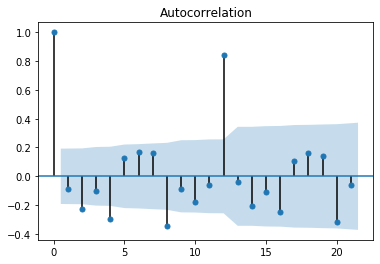

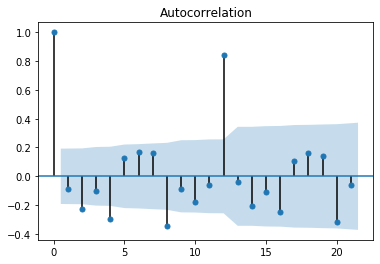

In [31]:
plot_acf(sales_diff)

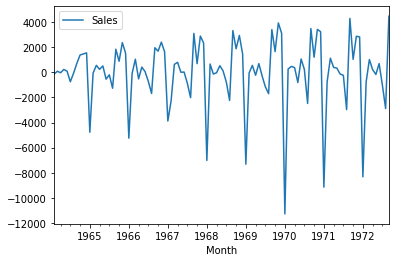

In [32]:
sales_diff.plot()

In [34]:
X = df.values

In [37]:
X.shape

(105, 1)

In [38]:
train = X[:79]
test = X[79:]

In [47]:
test.size

26

In [42]:
from statsmodels.tsa.arima_model import ARIMA

In [130]:
model_arima = ARIMA(train,order=(9,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

1407.44698495521


In [131]:
predictions = model_arima_fit.forecast(steps=26)[0]

In [132]:
predictions

array([ 2131.75665641,  8858.67290873, 12156.28903464, 10432.83003691,
        9187.13025916,  5793.54607395,  3038.44764505,  2492.74623056,
        4772.39922866,  4162.61040758,  2507.32633541,  4445.85779713,
        6251.47345105,  9105.8074149 , 11939.96481593, 11393.55660623,
        7938.1561015 ,  4908.40256216,  4196.50634924,  3652.77038863,
        3872.89035082,  4273.46268533,  3752.19887365,  4852.40839706,
        7976.85011646, 10927.06912748])

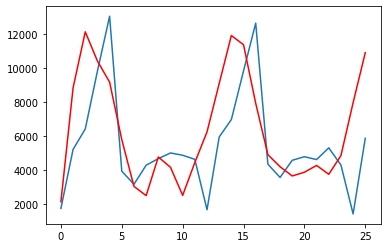

In [133]:
plt.plot(test)
plt.plot(predictions,'r')

In [73]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))

In [102]:
import warnings
warnings.filterwarnings('ignore')
for params in pdq:
    try:
        model_arima = ARIMA(train,order=(params))
        model_arima_fit = model_arima.fit()
        print(params,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 1455.9772031858956
(0, 0, 1) 1432.3632397943102
(0, 0, 2) 1434.2251121007864
(0, 0, 3) 1434.3641988457039
(0, 0, 4) 1430.792396327441
(0, 1, 0) 1439.8404351499316
(0, 1, 1) 1441.271428229581
(0, 1, 2) 1417.0690742947136
(0, 1, 3) 1419.0539401332253
(0, 1, 4) 1420.1777627898489
(0, 2, 0) 1480.3115146796524
(0, 2, 1) 1428.755287968133
(0, 2, 2) 1430.4158556389082
(0, 2, 3) 1409.4470662350814
(0, 2, 4) 1411.4226277475598
(1, 0, 0) 1436.5382287637735
(1, 0, 1) 1434.1271754325533
(1, 1, 0) 1441.558469516831
(1, 1, 1) 1422.029740549532
(1, 1, 2) 1419.046477663581
(1, 1, 3) 1420.2657219407677
(1, 2, 0) 1467.5072052754178
(2, 0, 0) 1433.0121327425582
(2, 0, 1) 1433.8516560667153
(2, 0, 3) 1421.326405039681
(2, 0, 4) 1422.3121095211523
(2, 1, 0) 1439.2657043019506
(2, 1, 1) 1417.126696727464
(2, 2, 0) 1459.0222556565784
(3, 0, 0) 1434.1542143443007
(3, 0, 1) 1439.6457431239048
(3, 1, 0) 1438.6706860121435
(3, 1, 1) 1417.0499250120833
(3, 1, 2) 1405.501156577516
(3, 1, 3) 1406.24618861

In [104]:
import statsmodels.api as sm

In [134]:
model = sm.tsa.statespace.SARIMAX(df['Sales'],order=(9,1,1),seasonal=(9,1,1,12))
result = model.fit()

In [135]:
df['forecast'] = result.predict(start=79,end=105,dynamic=True)

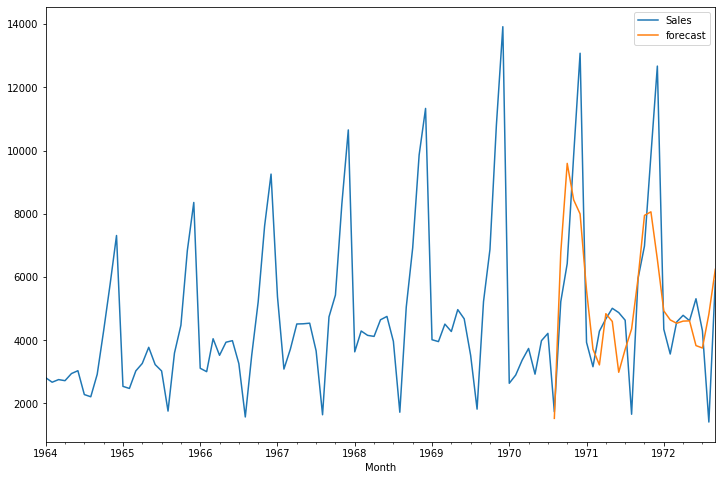

In [136]:
df[['Sales','forecast']].plot(figsize=(12,8))

In [137]:
from pandas.tseries.offsets import DateOffset

In [138]:
df.tail()

,Sales,forecast
Month,,
1972-05-01,4618.0,4612.493466
1972-06-01,5312.0,3830.463972
1972-07-01,4298.0,3754.499604
1972-08-01,1413.0,4823.243675
1972-09-01,5877.0,6242.155292


In [139]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,37)]

In [140]:
future_date_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [141]:
future_df = pd.concat([df,future_date_df])

In [142]:
future_df['forecast'] = result.predict(start=103,end=135,dynamic=True)

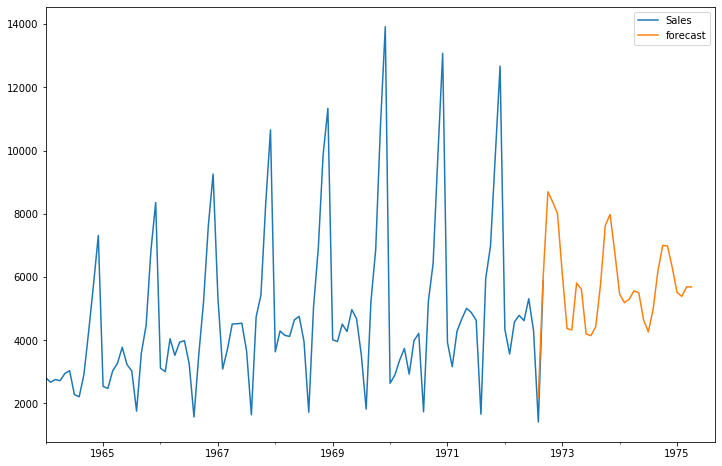

In [143]:
future_df[['Sales','forecast']].plot(figsize=(12,8))